In [4]:
import pandas as pd
import numpy as np

In [90]:
# Parameters
recommendations = "../data/recommendations_0.json"
users = "../data/users.json"
output = "../output/test.png"
cut_off = 10

In [88]:
# Read data
recommendations_df = pd.read_json(recommendations, orient="table")
user_ids = pd.read_json(users, orient="table")["user"].values
recommendations_base = recommendations_df[recommendations_df["limit"]==10]
recommendations_test = recommendations_df[recommendations_df["limit"]==50]

In [73]:
def apk(list_actual: list, list_predicted: list, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    list_actual : list
             A list of elements that are to be predicted (order doesn't matter)
    list_predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(list_predicted) > k:
        list_predicted = list_predicted[:min(len(list_actual), k)]

    sum_precision = 0.0
    num_hits = 0.0
    
    for i, prediction in enumerate(list_predicted):
        if prediction in list_actual and prediction not in list_predicted[:i]:
            num_hits += 1.0
            precision_at_i = num_hits / (i + 1.0)
            sum_precision += precision_at_i

    if not list_actual:
        return 0.0

    return sum_precision / min(len(list_actual), k)


def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [78]:
list_actuals = []
list_predictions = []
list_mapk = []
for k in range(1, cut_off + 1):
    for i, uid in enumerate(user_ids):
#         print(k)
        actual = recommendations_base[recommendations_base["user"]==uid]["recommendations"].values[0]
#         print(actual)
        predicted = recommendations_test[recommendations_test["user"]==uid]["recommendations"].values[0]
#         print(predicted)
        apk(actual, predicted, int(k))
#         print(f"apk {a} for user {uid}")
        list_actuals.append(actual)
        list_predictions.append(predicted)
    m = mapk(list_actuals, list_predictions, int(k))
    list_mapk.append(m)
    print(f"map@{k}: {m}")

map@1: 0.948
map@2: 0.937
map@3: 0.9146666666666666
map@4: 0.889125
map@5: 0.8693
map@6: 0.8471944444444444
map@7: 0.8165748299319727
map@8: 0.7864404761904763
map@9: 0.7539223985890652
map@10: 0.7136501587301587


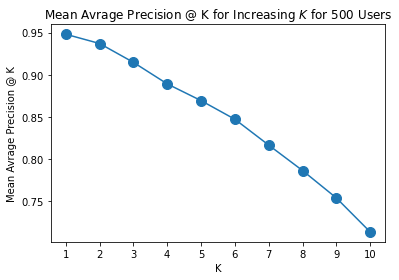

In [92]:
import matplotlib.pyplot as plt
list_k = range(1, cut_off + 1)
fig, ax = plt.subplots()
ax.plot(list_k, list_mapk , markersize=10, marker="o")
ax.set_xlabel("K")
plt.xticks(list_k)
ax.set_ylabel("Mean Avrage Precision @ K")
# plt.yticks(list_mapk)
ax.set_title(f"Mean Avrage Precision @ K for Increasing $K$ for {len(user_ids)} Users")

fig.savefig(output, bbox_inches='tight')